# Predicting Heart disease using Machine Learning
----

## About the Data
| Variable Name | Role      | Type       | Demographic Description                                            | Units     | Missing Values |
|-------------- |---------- |----------- |---------------------------------------------------------- |----------- |--------------- |
| age           | Feature   | Integer    | Age                                                              | years     | no             |
| sex           | Feature   | Categorical | Sex                                                              |           | no             |
| cp            | Feature   | Categorical |                                                                  |           | no             |
| trestbps      | Feature   | Integer    | Resting blood pressure (on admission to the hospital)         | mm Hg     | no             |
| chol          | Feature   | Integer    | Serum cholestoral                                                 | mg/dl     | no             |
| fbs           | Feature   | Categorical | Fasting blood sugar > 120 mg/dl                                  |           | no             |
| restecg       | Feature   | Categorical |                                                                  |           | no             |
| thalach       | Feature   | Integer    | Maximum heart rate achieved                                       |           | no             |
| exang         | Feature   | Categorical | Exercise induced angina                                           |           | no             |
| oldpeak       | Feature   | Integer    | ST depression induced by exercise relative to rest               |           | no             |
| slope         | Feature   | Categorical |                                                                  |           | no             |
| ca            | Feature   | Integer    | Number of major vessels (0-3) colored by flourosopy             |           | yes            |
| thal          | Feature   | Categorical |                                                                  |           | yes            |
| num           | Target    | Integer    | Diagnosis of heart disease                                        |           | no             |


This data was extracted from UCI Machine Learning Repository [https://archive.ics.uci.edu/dataset/45/heart+disease]

----

## Data Dictionary

* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
    1. Value 0: typical angina
    2. Value 1: atypical angina
    3. Value 2: non-anginal pain
    4. Value 3: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
    1. Value 0: normal
    2. Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    3. Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
    1. Value 0: upsloping
    2. Value 1: flat
    3. Value 2: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
and the label
* condition: 0 = no disease, 1 = disease
----

# Heart Disease Prediction - Initial Setup

In this notebook, we will develop a machine learning model to predict heart disease. We will start by performing Exploratory Data Analysis (EDA) and then proceed with building, training, and evaluating machine learning models.

## Importing Libraries

We begin by importing the necessary libraries for data analysis, visualization, and machine learning:

- `numpy` and `pandas` for data manipulation
- `matplotlib` and `seaborn` for data visualization
- Various models from `scikit-learn` for machine learning
- Modules for model evaluation, including data splitting, cross-validation, and performance metrics.

Let's start by setting up our environment and loading the dataset.


In [37]:
# For regular EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Sci-kit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

----
# Data Loading and Initial Inspection

We'll start by loading the heart disease dataset from a CSV file named 'heart-disease.csv' and inspecting its basic properties. This step is crucial to understand the structure of the data and its dimensions.

## Loading the Dataset

We will use the `pandas` library to load the dataset and then check its shape to determine the number of rows and columns.

Let's go ahead and load the data and explore its dimensions.


In [38]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

----
# Exploring the Dataset

To gain an initial understanding of the data, let's take a look at the first and last few rows of the dataset. This allows us to see a sample of the data's structure and its contents.

## Displaying Data Samples

We will use the `head()` method to display the first few rows and the `tail()` method to show the last few rows of the dataset.

Let's examine both the beginning and the end of the dataset.


In [39]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Now, let's also take a look at the last few rows of the dataset.


In [40]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


----
# Class Distribution

To understand the distribution of classes in the target variable, we will count the occurrences of each unique value. This will help us assess the balance or imbalance between the classes in our dataset.

## Class Distribution

Let's count the occurrences of each unique value in the 'target' column.


In [41]:
# Count and display the distribution of target classes
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

----
# Visualizing Class Distribution

Let's create a bar plot to visualize the distribution of classes in the 'target' variable. This will provide a visual representation of the balance or imbalance between the classes.

## Class Distribution Plot

We will use a bar plot to visualize the class distribution, with colors indicating different classes.

Let's create the plot.


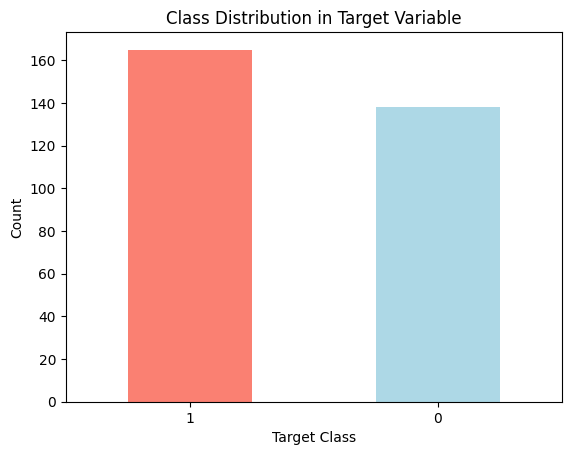

In [42]:
# Create a bar plot for class distribution
df['target'].value_counts().plot(kind='bar', color=["salmon", 'lightblue'])
plt.title('Class Distribution in Target Variable')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


----
# Dataset Information

Let's obtain essential information about our dataset. This includes details about the data types, non-null counts, and memory usage for each column. Understanding the structure of the dataset is crucial for data preprocessing and feature engineering.

## Dataset Information

We will use the `info()` method to provide an overview of the dataset's characteristics.

Let's inspect the dataset information.


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


----
# Handling Missing Data

It's essential to identify and handle missing data in the dataset to ensure the quality of our analysis and machine learning models. Let's check for missing values in the dataset.

## Missing Data Summary

We will use the `isna().sum()` method to count the missing values in each column. This summary will help us understand the extent of missing data in our dataset.

Let's inspect the missing data summary.


In [44]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Dataset Summary Statistics

To gain a deeper understanding of our dataset, let's compute and display summary statistics. This includes measures such as mean, standard deviation, minimum, and maximum values for each numerical column.

## Summary Statistics

We will use the `describe()` method to generate summary statistics for the dataset's numerical columns.

Let's compute and display the summary statistics.


In [45]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


----
# Exploring Relationship Between Gender and Heart Disease

Let's investigate the relationship between the 'sex' variable (gender) and the 'target' variable (presence of heart disease). We will create a cross-tabulation to visualize this relationship.

## Cross-Tabulation

We will use the `pd.crosstab()` function to create a cross-tabulation of gender and heart disease presence, which will help us understand how they are related.

Let's create the cross-tabulation.


In [46]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


# Visualizing Gender Distribution Among Heart Disease Patients

To visualize the distribution of gender among individuals with and without heart disease, we'll create a bar plot based on the cross-tabulation of the 'target' and 'sex' variables.

## Gender Distribution Plot

We will use the `pd.crosstab()` function to create the cross-tabulation, and then plot the results to visualize the gender distribution.

Let's create the plot.


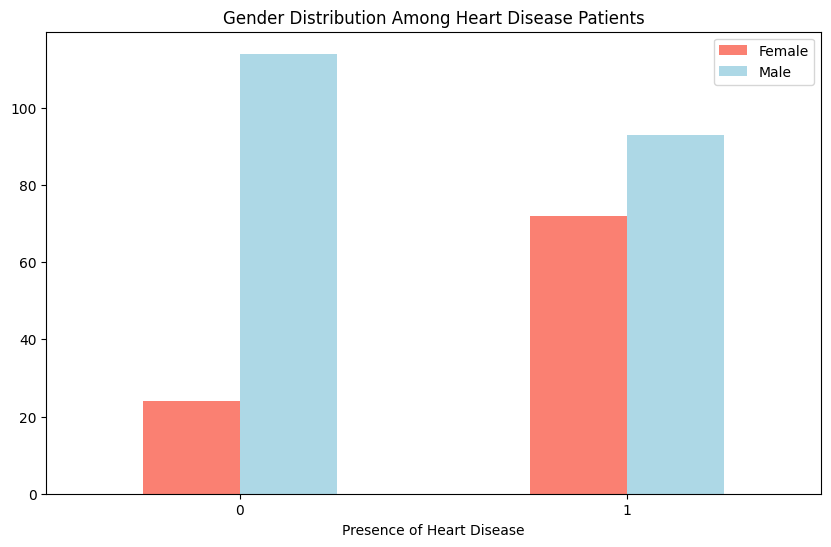

In [47]:
# Create a cross-tabulation of gender and heart disease presence
gender_heart_disease = pd.crosstab(df.target, df.sex)

# Plot the cross-tabulation results
gender_heart_disease.plot(kind='bar', figsize=(10, 6), color=['salmon', 'lightblue'])
plt.legend(['Female', 'Male'])
plt.title('Gender Distribution Among Heart Disease Patients')
plt.xlabel('Presence of Heart Disease')
plt.xticks(rotation=0)
plt.show()


----
# Age vs. Max Heart Rate Analysis

Let's explore the relationship between age, maximum heart rate, and the presence of heart disease. We will create a scatter plot to visualize this relationship. Individuals with heart disease will be represented in salmon color, and those without heart disease will be represented in light blue color.

## Scatter Plot: Age vs. Max Heart Rate

We will use a scatter plot to visualize the distribution of maximum heart rate (`thalach`) based on age (`age`) and distinguish between individuals with and without heart disease.

Let's create the scatter plot.


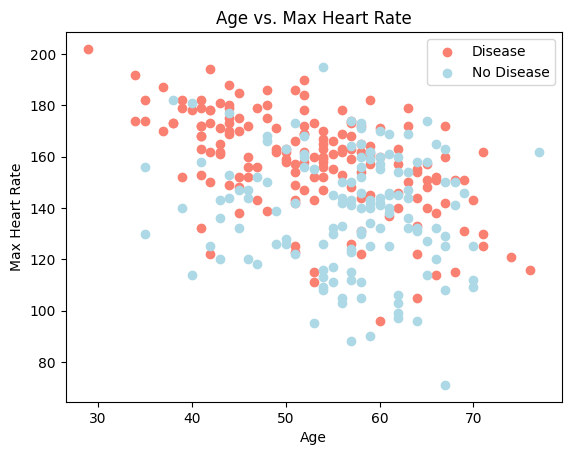

In [48]:
# Create a scatter plot for age vs. max heart rate based on heart disease presence
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], color='salmon')
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], color='lightblue')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease'])
plt.title('Age vs. Max Heart Rate')
plt.show()


# Age Distribution Analysis

Let's examine the distribution of ages in our dataset by creating a histogram. This will provide insights into the age demographics of the individuals in the dataset.

## Age Distribution Histogram

We will use a histogram to visualize the distribution of ages in the dataset.

Let's create the histogram.


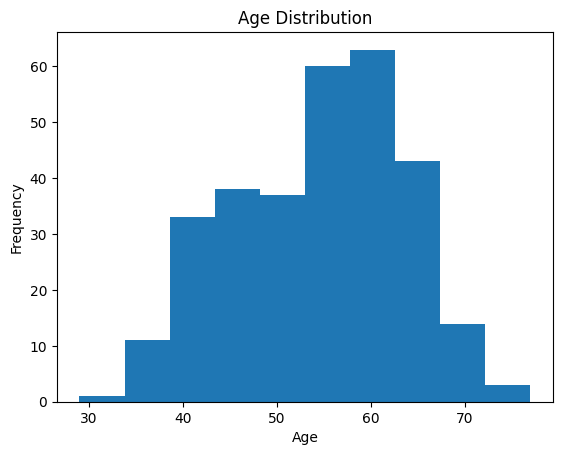

In [49]:
# Create a histogram to visualize the age distribution
df.age.plot.hist()
plt.xlabel('Age')
plt.title('Age Distribution')
plt.show()


----
# Feature Correlation Analysis

Understanding the correlations between different features is essential for building accurate machine learning models. Let's visualize the feature correlations using a heatmap. This heatmap will help us identify potential relationships between variables.

## Feature Correlation Heatmap

We will create a heatmap to visualize the correlation matrix of the dataset. Correlation values close to 1 or -1 indicate strong positive or negative correlations, respectively, between the corresponding features.

Let's create the heatmap.


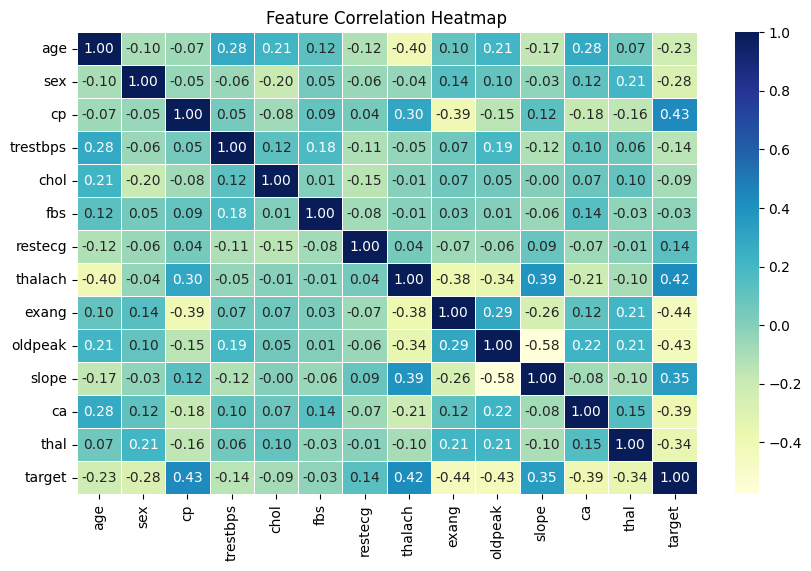

In [50]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")
plt.title('Feature Correlation Heatmap')
plt.show()


----
# Data Splitting for Machine Learning

To prepare our dataset for machine learning, we need to split it into features (X) and the target variable (y). We will also create training and testing sets to evaluate our machine learning models' performance.

## Data Splitting

We will split the dataset into features (X) and the target variable (y). Additionally, we will create training and testing sets with a 20% test size.

Let's perform the data splitting.


In [51]:
# Separate features (X) and the target variable (y)
X = df.drop('target', axis=1).values
y = df['target'].values

# Set a random seed for reproducibility
np.random.seed(42)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


----
# Model Selection and Evaluation

To evaluate the performance of various machine learning models, we will define a function that fits each model to the training data and calculates their accuracy on the testing data. We'll use three different models for our evaluation.

## Model Selection and Evaluation Function

We have selected the following machine learning models for evaluation:
- Logistic Regression
- K-Nearest Neighbors (KNN)
- Random Forest

The function `fit_and_score()` will fit each of these models to the training data and calculate their accuracy on the testing data. This will help us compare and select the best-performing model.

Let's define the function and evaluate the models.


In [52]:
# Define the machine learning models for evaluation
models = {
    'LogisticRegression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier()
}

# Define a function to fit and score the models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores


# Model Evaluation Results

We have evaluated three different machine learning models using the `fit_and_score()` function. Here are the accuracy scores for each model on the testing data.

## Model Evaluation Results

Let's calculate and display the accuracy scores for the models we have evaluated.



In [53]:
import warnings
warnings.filterwarnings("ignore")

# Evaluate the models and obtain their accuracy scores
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

# Display the accuracy scores for each model
model_scores


{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForest': 0.8360655737704918}

----
# Model Comparison

To compare the performance of different machine learning models, we have calculated their accuracy scores on the testing data. We will create a bar plot to visualize and compare the accuracy of each model.

## Model Comparison Plot

We will create a DataFrame to compare the accuracy scores and then generate a bar plot for visual comparison.

Let's create the comparison plot.


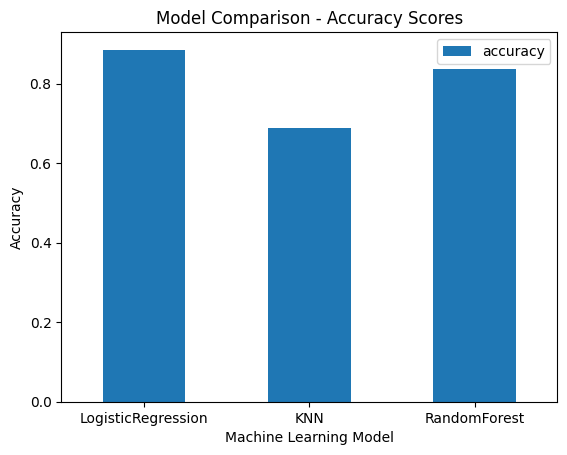

In [54]:
# Create a DataFrame to compare the accuracy scores
model_compare = pd.DataFrame(model_scores, index=['accuracy'])

# Transpose the DataFrame and plot the accuracy comparison
model_compare.T.plot.bar()
plt.title('Model Comparison - Accuracy Scores')
plt.xlabel('Machine Learning Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=0)
plt.show()


----
# Hyperparameter Tuning: Finding the Optimal Number of Neighbors (K)

In this step, we aim to find the optimal number of neighbors (K) for the K-Nearest Neighbors (KNN) classifier. We will vary the number of neighbors and record both training and testing scores for each value of K.

## Hyperparameter Tuning

We will use a for loop to iterate over a range of values for K, fitting the KNN model with each value. We will record the training and testing scores to identify the best value for K.

Let's perform hyperparameter tuning for the KNN classifier.


In [55]:
train_scores = []
test_scores = []

neighbors = range(1, 21)

knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)

    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

# Display the training and testing scores for each value of K
print(f"Train scores: {train_scores}\nTest scores: {test_scores}")


Train scores: [1.0, 0.8099173553719008, 0.7727272727272727, 0.743801652892562, 0.7603305785123967, 0.7520661157024794, 0.743801652892562, 0.7231404958677686, 0.71900826446281, 0.6942148760330579, 0.7272727272727273, 0.6983471074380165, 0.6900826446280992, 0.6942148760330579, 0.6859504132231405, 0.6735537190082644, 0.6859504132231405, 0.6652892561983471, 0.6818181818181818, 0.6694214876033058]
Test scores: [0.6229508196721312, 0.639344262295082, 0.6557377049180327, 0.6721311475409836, 0.6885245901639344, 0.7213114754098361, 0.7049180327868853, 0.6885245901639344, 0.6885245901639344, 0.7049180327868853, 0.7540983606557377, 0.7377049180327869, 0.7377049180327869, 0.7377049180327869, 0.6885245901639344, 0.7213114754098361, 0.6885245901639344, 0.6885245901639344, 0.7049180327868853, 0.6557377049180327]


# Hyperparameter Tuning Results

Now that we've performed hyperparameter tuning by varying the number of neighbors (K) in the K-Nearest Neighbors (KNN) classifier, let's visualize the results to determine the optimal value of K.

## Hyperparameter Tuning Results

We will create a line plot to visualize how the training and testing scores change with different values of K. This will help us identify the optimal K value for the KNN classifier.

Let's visualize the results and find the maximum test score.


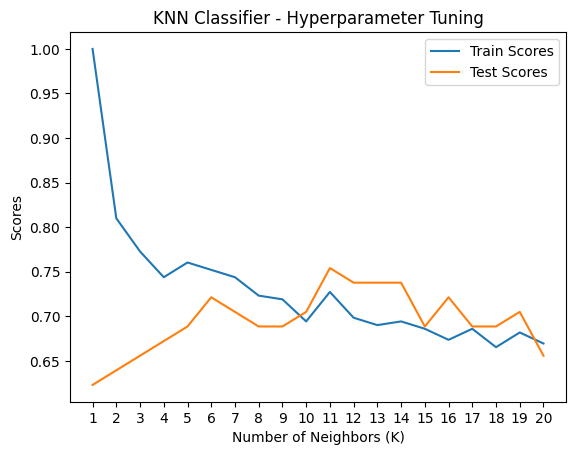

Maximum KNN Score in test data: 75.41%


In [56]:
# Create a line plot to visualize the training and testing scores for different K values
plt.plot(neighbors, train_scores, label='Train Scores')
plt.plot(neighbors, test_scores, label='Test Scores')
plt.xticks(range(1, 21, 1))
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.legend()
plt.title('KNN Classifier - Hyperparameter Tuning')
plt.show()

# Find and display the maximum test score
max_test_score = max(test_scores)
print(f"Maximum KNN Score in test data: {max_test_score * 100:.2f}%")


----
# Hyperparameter Grids for Model Tuning

In this section, we'll define the hyperparameter grids that we'll use for tuning the models. For our tuning, we have selected two models: Logistic Regression and Random Forest. These grids specify the hyperparameters and their respective ranges for each model.

## Hyperparameter Grids

We have defined the following hyperparameter grids for model tuning:

1. For Logistic Regression:
   - `C`: Regularization strength parameter
   - `solver`: Algorithm for optimization (we use 'liblinear')

2. For Random Forest:
   - `n_estimators`: Number of decision trees in the forest
   - `max_depth`: Maximum depth of each tree
   - `min_samples_split`: Minimum samples required to split a node
   - `min_samples_leaf`: Minimum samples required for a leaf node

These grids will help us search for the best hyperparameters to optimize model performance.

Let's define the hyperparameter grids.


In [57]:
# Hyperparameter grid for Logistic Regression
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}

# Hyperparameter grid for Random Forest
rf_grid = {
    'n_estimators': np.arange(10, 1000, 50),
    'max_depth': ['None', 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2)
}


----
# Hyperparameter Tuning for Logistic Regression

We are tuning the hyperparameters of the Logistic Regression model to find the best combination for improved performance. We'll use RandomizedSearchCV for this purpose.

## Hyperparameter Tuning

We are performing hyperparameter tuning using RandomizedSearchCV, with the following settings:
- Model: Logistic Regression
- Parameter Grid: `log_reg_grid` defined previously
- Cross-validation: 5-fold cross-validation
- Number of Iterations: 20
- Random Seed: Set for reproducibility

Let's execute the hyperparameter tuning process for Logistic Regression.


In [58]:
np.random.seed(42)

# Create a RandomizedSearchCV object for Logistic Regression hyperparameter tuning
rs_log_reg = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=log_reg_grid,
    cv=5,
    n_iter=20,
    verbose=True
)

# Fit the RandomizedSearchCV to the training data
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

# Best Hyperparameters for Logistic Regression

After performing hyperparameter tuning using RandomizedSearchCV for the Logistic Regression model, let's find and display the best hyperparameters that have been identified.

## Best Hyperparameters

We will retrieve the best hyperparameters from the hyperparameter tuning process.

Let's find the best hyperparameters for Logistic Regression.


In [59]:
# Display the best hyperparameters found during hyperparameter tuning
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

# Model Evaluation: Logistic Regression

Let's evaluate the Logistic Regression model's performance on the test data using the best hyperparameters identified during hyperparameter tuning. We'll calculate and display the accuracy score.

## Model Evaluation

We are evaluating the Logistic Regression model using the best hyperparameters obtained from the hyperparameter tuning process.

Let's evaluate the model's accuracy on the test data.


In [60]:
# Calculate and display the accuracy score of the Logistic Regression model on the test data
rs_log_reg.score(X_test, y_test) * 100


88.52459016393442

----
# Hyperparameter Tuning for Random Forest

We are tuning the hyperparameters of the Random Forest classifier to find the best combination for improved performance. We'll use RandomizedSearchCV for this purpose.

## Hyperparameter Tuning

We are performing hyperparameter tuning using RandomizedSearchCV, with the following settings:
- Model: Random Forest Classifier
- Parameter Grid: `rf_grid` defined previously
- Cross-validation: 5-fold cross-validation
- Number of Iterations: 20
- Random Seed: Set for reproducibility

Let's execute the hyperparameter tuning process for the Random Forest classifier.


In [61]:
np.random.seed(42)

# Create a RandomizedSearchCV object for Random Forest hyperparameter tuning
rs_rf = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=rf_grid,
    cv=5,
    n_iter=20,
    verbose=True
)

# Fit the RandomizedSearchCV to the training data
rs_rf.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': ['None', 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

# Best Hyperparameters for Random Forest

After performing hyperparameter tuning using RandomizedSearchCV for the Random Forest classifier, let's find and display the best hyperparameters that have been identified.

## Best Hyperparameters

We will retrieve the best hyperparameters from the hyperparameter tuning process.

Let's find the best hyperparameters for the Random Forest classifier.


In [62]:
# Display the best hyperparameters found during hyperparameter tuning for the Random Forest classifier
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 2,
 'min_samples_leaf': 19,
 'max_depth': 5}

# Model Evaluation: Random Forest

Let's evaluate the Random Forest classifier's performance on the test data using the best hyperparameters identified during hyperparameter tuning. We'll calculate and display the accuracy score.

## Model Evaluation

We are evaluating the Random Forest classifier using the best hyperparameters obtained from the hyperparameter tuning process.

Let's evaluate the model's accuracy on the test data.


In [63]:
# Calculate and display the accuracy score of the Random Forest classifier on the test data
rs_rf.score(X_test, y_test)

0.8688524590163934

----
# Hyperparameter Tuning for Logistic Regression (Grid Search)

We are tuning the hyperparameters of the Logistic Regression model using GridSearchCV to find the best combination for improved performance.

## Hyperparameter Tuning

We are performing hyperparameter tuning using GridSearchCV, with the following settings:
- Model: Logistic Regression
- Parameter Grid: `log_reg_grid` defined previously
- Cross-validation: 5-fold cross-validation

Let's execute the hyperparameter tuning process for Logistic Regression using grid search.


In [64]:
# Create a GridSearchCV object for Logistic Regression hyperparameter tuning
gs_log_reg = GridSearchCV(
    LogisticRegression(),
    param_grid=log_reg_grid,
    cv=5,
    verbose=True
)

# Fit the GridSearchCV to the training data
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

# Best Hyperparameters for Logistic Regression (Grid Search)

After performing hyperparameter tuning using GridSearchCV for the Logistic Regression model, let's find and display the best hyperparameters that have been identified.

## Best Hyperparameters

We will retrieve the best hyperparameters from the hyperparameter tuning process using grid search.

Let's find the best hyperparameters for Logistic Regression.


In [65]:
# Display the best hyperparameters found during hyperparameter tuning for Logistic Regression using grid search
gs_log_reg.best_params_


{'C': 0.23357214690901212, 'solver': 'liblinear'}

# Model Evaluation: Logistic Regression (Grid Search)

Let's evaluate the Logistic Regression model's performance on the test data using the best hyperparameters identified through GridSearchCV. We'll calculate and display the accuracy score.

## Model Evaluation

We are evaluating the Logistic Regression model using the best hyperparameters obtained from the hyperparameter tuning process with grid search.

Let's evaluate the model's accuracy on the test data.


In [66]:
# Calculate and display the accuracy score of the Logistic Regression model with the best hyperparameters on the test data
gs_log_reg.score(X_test, y_test)


0.8852459016393442

----
# Making Predictions on Test Data

Now that we have fine-tuned the Logistic Regression model using GridSearchCV, let's make predictions on the test data to evaluate the model's performance and generate classification results.

## Predictions on Test Data

We will use the best hyperparameters to make predictions on the test data and obtain classification results.

Let's make predictions on the test data.


In [67]:
# Make predictions on the test data using the Logistic Regression model with the best hyperparameters
y_preds = gs_log_reg.predict(X_test)

----
# Model Evaluation: Confusion Matrix

To assess the performance of the Logistic Regression model on the test data, we will create a confusion matrix. A confusion matrix provides insights into the model's ability to correctly classify instances into different categories.

## Confusion Matrix

We will generate a confusion matrix using the true labels (`y_test`) and the predicted labels (`y_preds`) on the test data.

Let's calculate and display the confusion matrix.


In [68]:
# Calculate and display the confusion matrix for model evaluation
confusion_matrix(y_test, y_preds)


array([[25,  4],
       [ 3, 29]], dtype=int64)

# Visualization: Confusion Matrix Heatmap

To visualize the confusion matrix and better understand the performance of the Logistic Regression model, we will create a heatmap. This heatmap will display the true and predicted labels and highlight the different categories.

## Confusion Matrix Heatmap

We will use a heatmap to visualize the confusion matrix. The heatmap will include annotations to display the values, and the color scale will provide a visual representation of the true and predicted labels.

Let's create the confusion matrix heatmap.


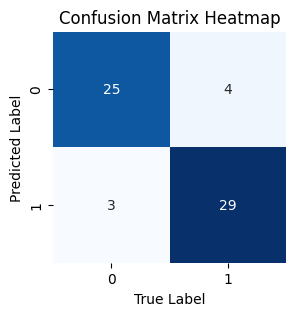

In [69]:
# Create a heatmap of the confusion matrix
fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False, cmap="Blues")
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Model Evaluation: Classification Report

To gain a deeper understanding of the model's performance, we will generate a classification report. This report includes various performance metrics, such as precision, recall, F1-score, and support, for different classes.

## Classification Report

We will create a classification report based on the true labels (`y_test`) and the predicted labels (`y_preds`) on the test data.

Let's generate and display the classification report.


In [70]:
# Generate and display the classification report for model evaluation
print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



----
# Predicting Heart Disease - Manual Input

This code allows users to manually input data related to various health features and predicts the presence or absence of heart disease based on the provided input. The code first defines a dictionary that maps feature names to user-friendly descriptions. It then collects user input for each feature, converting the input to the appropriate data type.

## Features and Descriptions

The features and their descriptions are as follows:

- **Age (in years)**
- **Sex (1 = Male, 0 = Female)**
- **Chest Pain Type (0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic)**
- **Resting Blood Pressure (mm Hg)**
- **Serum Cholestoral (mg/dl)**
- **Fasting Blood Sugar (>120 mg/dl) (1 = True, 0 = False)**
- **Resting Electrocardiographic Results (0 = Normal, 1 = ST-T Wave Abnormality, 2 = Probable or Definite Left Ventricular Hypertrophy)**
- **Maximum Heart Rate Achieved**
- **Exercise Induced Angina (1 = Yes, 0 = No)**
- **ST Depression Induced by Exercise Relative to Rest**
- **Slope of the Peak Exercise ST Segment (0 = Upsloping, 1 = Flat, 2 = Downsloping)**
- **Number of Major Vessels Colored by Flourosopy (0-3)**
- **Thal (0 = Normal, 1 = Fixed Defect, 2 = Reversible Defect)**

## User Input and Prediction

The code collects user input for each feature, creates a DataFrame, and then makes a prediction using a trained model (replace `'model'` with your actual trained model variable). The prediction result, indicating the presence or absence of heart disease, is provided to the user.

Please provide values for the features as prompted to make a prediction regarding heart disease.


In [71]:
from joblib import load, dump

dump(gs_log_reg, 'LogisticRegression.joblib')

['LogisticRegression.joblib']

In [72]:
# # Create a dictionary to map feature names to more user-friendly descriptions
# feature_mapping = {
#     "age": "Age (in years)",
#     "sex": "Sex (1 = Male, 0 = Female)",
#     "cp": "Chest Pain Type (0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic)",
#     "trestbps": "Resting Blood Pressure (mm Hg)",
#     "chol": "Serum Cholestoral (mg/dl)",
#     "fbs": "Fasting Blood Sugar (>120 mg/dl) (1 = True, 0 = False)",
#     "restecg": "Resting Electrocardiographic Results (0 = Normal, 1 = ST-T Wave Abnormality, 2 = Probable or Definite Left Ventricular Hypertrophy)",
#     "thalach": "Maximum Heart Rate Achieved",
#     "exang": "Exercise Induced Angina (1 = Yes, 0 = No)",
#     "oldpeak": "ST Depression Induced by Exercise Relative to Rest",
#     "slope": "Slope of the Peak Exercise ST Segment (0 = Upsloping, 1 = Flat, 2 = Downsloping)",
#     "ca": "Number of Major Vessels Colored by Flourosopy (0-3)",
#     "thal": "Thal (0 = Normal, 1 = Fixed Defect, 2 = Reversible Defect)"
# }

# # Create an empty dictionary to collect user inputs
# user_inputs = {}

# # Loop through the feature names and request user input for each feature
# for feature_name, feature_description in feature_mapping.items():
#     user_input = input(f"Enter the value for {feature_description}: ")
#     # Convert the input to the appropriate data type (e.g., integer or float)
#     if feature_name in ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]:
#         user_input = int(user_input)
#     else:
#         user_input = float(user_input)
#     user_inputs[feature_name] = user_input

# # Create a DataFrame from user inputs for prediction
# user_data = pd.DataFrame(user_inputs, index=[0])

# # Make a prediction using the trained model (replace 'model' with your trained model)
# user_prediction = gs_log_reg.predict(user_data)

# # Provide the prediction to the user
# if user_prediction[0] == 1:
#     print("Based on the provided data, it is predicted that you have heart disease.")
# else:
#     print("Based on the provided data, it is predicted that you do not have heart disease.")


----
----

# Conclusion

In this Jupyter Notebook, we have explored the prediction of heart disease using a machine learning model. We started by conducting exploratory data analysis (EDA) to gain insights into the dataset and understand the relationships between various features and the presence of heart disease.

We then proceeded to build, train, and fine-tune a machine learning model to predict heart disease. The model was evaluated using various metrics, including accuracy, a confusion matrix, and a classification report, to assess its performance.

Finally, we provided a code section that allows users to input their health-related data to receive predictions regarding the presence or absence of heart disease. This interactive feature can be a valuable tool for individuals to assess their own risk.

It's important to note that while machine learning models can provide valuable insights and predictions, they should not be a replacement for professional medical advice. For accurate and personalized medical guidance, it's always recommended to consult with healthcare professionals.

Thank you for following along in this notebook. We hope it has been a helpful exploration of the application of machine learning in the context of heart disease prediction. If you have any questions or further analysis you'd like to perform, feel free to continue experimenting and extending this notebook.

[Srikar Veluvali]

[28-10-2023]

----